---
#### 제로베이스(https://zero-base.co.kr/)
#### 데이터사이언스 90일 완주반 
---
#### **Guideline**
- 총점 100점으로 주차별로 약 2~3개 문제가 제시됩니다
- 각 문제마다 안내사항과 요구사항을 꼼꼼하게 확인해주신 후, 코드를 작성해주세요 
- 코드는 제시드리는 결과만 같게 나온다면, 추후 모범답안으로 드리는 코드와 달라도 괜찮습니다 

#### **Notice!** 
- 제출 기한을 반드시 지켜주세요 
- 제출 전 코드가 정상적으로 실행되는지 검토해주세요
- 제출하신 코드에 대해 멘토님의 일부 주관적인 부분점수가 반영될 수 있습니다
- 부분점수 반영 시 상세한 피드백을 드릴 예정이오니, 문의가 있을시 멘토님과 담당 매니저님이 적극 소통할 예정입니다
---
# **2차 평가주 과제**
- 총 100점 3문제
---

# 1. (지도학습 55. 모형 최적화_20200117_02). (40점)
유방암 데이터를 예측하기위한 svm모델을 최적화 하세요.
* 모델 최적화를 위해 GridSearchCV를 이용하세요
* Hyper parameter의 범위는 (0.01, 0.1, 1.0, 10.0, 100.0)로 지정해주세요
* 최적모형의 점수와 최적 Hyper parameter를 출력하세요



In [12]:
# 이 코드를 먼저 실행하세요

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [14]:
# 여기에 코드를 작성하세요
b_data = load_breast_cancer()
X, y = b_data.data, b_data.target
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

gs.cv_results_["params"]
gs.cv_results_["mean_test_score"]

print(gs.best_score_)
print(gs.best_params_)

#cpu times: user 16.6s sys:4.99ms
# wall time: 16.6s
#print(gs.best_score_) >> 0.97888
#print(gs.best_params_) >> {'clf__C':0.1. 'clf__kernel': 'linear'}

CPU times: user 6.83 s, sys: 19 ms, total: 6.85 s
Wall time: 6.81 s
0.9788847117794486
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [15]:
print(gs.best_score_)
print(gs.best_params_)

0.9788847117794486
{'clf__C': 0.1, 'clf__kernel': 'linear'}


---

## 2. (지도학습 55. 모형 최적화_20200117_02)아래의 코드는 그리드서치를 이용한 모형 최적화 과정입니다. 빈칸('###')에 들어갈 코드를 작성해주세요. (30점)

In [1]:
# 라이브러리 로드
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# 데이터 로드
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
### 이곳에 코드를 작성해주세요.
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.01, 1.0, 10.0, 100.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

CPU times: user 1min 47s, sys: 129 ms, total: 1min 48s
Wall time: 1min 48s


In [4]:
# 그리드서치 파라미터
gs

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'clf__C': [0.0001, 0.01, 1.0, 10.0, 100.0],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.01, 1.0, 10.0, 100.0],
                          'clf__gamma': [0.0001, 0.01, 1.0, 10.0, 100.0],
                          'clf__kernel': ['rbf']}],
             scoring='accuracy')

CPU times: user 2min 25s, sys: 38.3 ms, total: 2min 25s
Wall time: 2min 25s


---

## 3. (비지도학습 09. 가우시안 혼합모형과 EM 방법_20200206_01)아래의 코드는 Scikit-Learn의 GaussianMixture 클래스를 이용해 데이터를 생성하고 시각화하는 과정입니다. 시각화 함수의 빈칸('###')을 채워주세요. (30점)

In [6]:
# 라이브러리 임포트
import numpy as np
import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
import warnings

from numpy.random import randn

from sklearn.mixture import GaussianMixture
from sklearn.exceptions import ConvergenceWarning

In [7]:
# 데이터 생성
n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2]

In [8]:
### 이곳에 코드를 작성해주세요.
def plot_gaussianmixture(n):
    model = GaussianMixture(n_components=2, init_params='random', random_state=0, tol=1e-9, max_iter=n)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                module="sklearn")
        model.fit(X)
    pi = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=pi[:, 0])
    plt.title("iteration: {}".format(n))

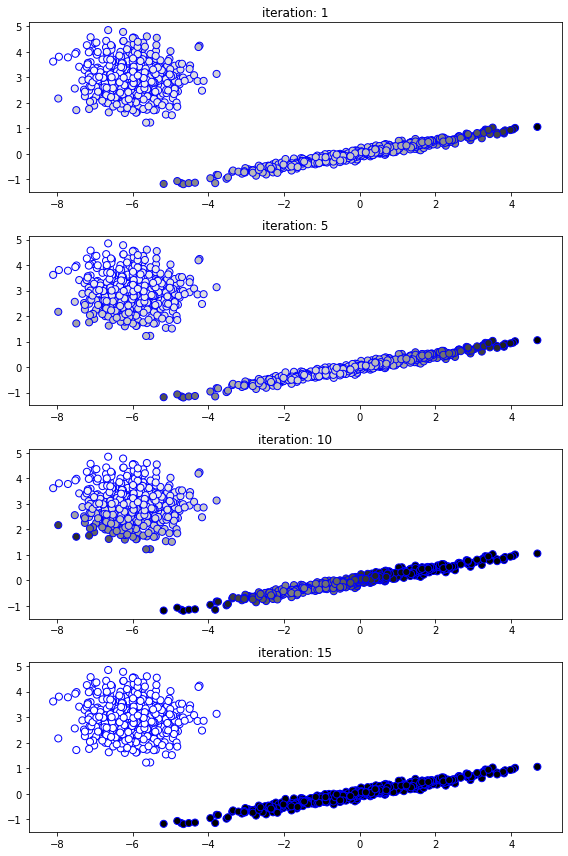

In [9]:
# 시각화
plt.figure(figsize=(8, 12))
plt.subplot(411)
plot_gaussianmixture(1)
plt.subplot(412)
plot_gaussianmixture(5)
plt.subplot(413)
plot_gaussianmixture(10)
plt.subplot(414)
plot_gaussianmixture(15)
plt.tight_layout()
plt.show()